In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ValidationCurveDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_curve, auc # Added roc_curve, auc
from sklearn.utils import shuffle
from sklearn.preprocessing import label_binarize

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
data = wine.data
target = wine.target

print("Veri seti yüklendi: Wine")
print(f"Veri şekli: {data.shape}")
print(f"Hedef şekli: {target.shape}")

Veri seti yüklendi: Wine
Veri şekli: (178, 13)
Hedef şekli: (178,)


In [4]:
df=pd.DataFrame(data,columns=wine.feature_names)
df['target']=target
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
X = df.drop('target', axis=1)
y = df['target']
#X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeClassifier(random_state=42) # Using DecisionTreeClassifier for classification
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # Using weighted average for multiclass

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")

# Note: Mean Squared Error is generally not suitable for classification problems with discrete classes
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")

Accuracy: 0.94
F1 Score (weighted): 0.94


--- GENEL PERFORMANS ---
Doğruluk (Accuracy): %94.44
Keskinlik (Precision - Weighted): 0.95
Duyarlılık (Recall - Weighted): 0.94
F1 Skoru (Weighted): 0.94

--- DETAYLI SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


--- KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) ---


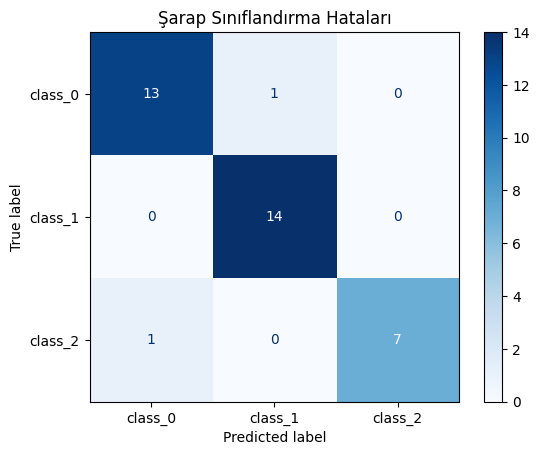

In [12]:
# Metrikleri içe aktarıyoruz
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
# --- METRİKLERİ HESAPLAMA ---

print("--- GENEL PERFORMANS ---")
# Doğruluk (Accuracy): Toplam doğru sayısı / Toplam veri sayısı
acc = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): %{acc * 100:.2f}")

# DİKKAT: Veri seti 3 sınıflı olduğu için average parametresi zorunludur!
# 'macro': Her sınıfın başarısını eşit kabul edip ortalama alır.
# 'weighted': Sınıfların veri sayısına göre ağırlıklı ortalama alır (Dengesiz veri için iyidir).

prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Keskinlik (Precision - Weighted): {prec:.2f}")
print(f"Duyarlılık (Recall - Weighted): {rec:.2f}")
print(f"F1 Skoru (Weighted): {f1:.2f}")

print("\n--- DETAYLI SINIFLANDIRMA RAPORU ---")
# Bu rapor her sınıf için (class_0, class_1, class_2) ayrı ayrı sonuçları verir
print(classification_report(y_test, y_pred, target_names=wine.target_names))

print("\n--- KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) ---")
# Görsel olarak nerede hata yaptığımızı görelim
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=wine.target_names, cmap="Blues")
plt.title("Şarap Sınıflandırma Hataları")
plt.show()

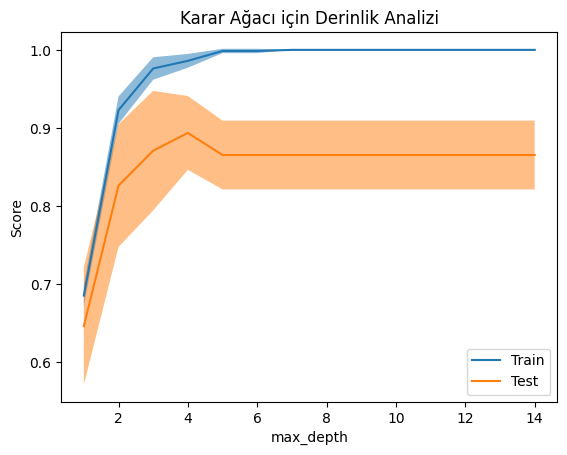

In [9]:
# Doğrulama Eğrisi
ValidationCurveDisplay.from_estimator(
   DecisionTreeClassifier(random_state=42), # Karar Ağacı
   X, y,
   param_name="max_depth", # Test edilecek parametre: Derinlik
   param_range=np.arange(1, 15) # 1'den 15'e kadar derinlikleri dene
)

plt.title("Karar Ağacı için Derinlik Analizi")
plt.show()

Grafiğe bakacak olursak modelin iyi bir genelleme yapcağı söylenebilir.

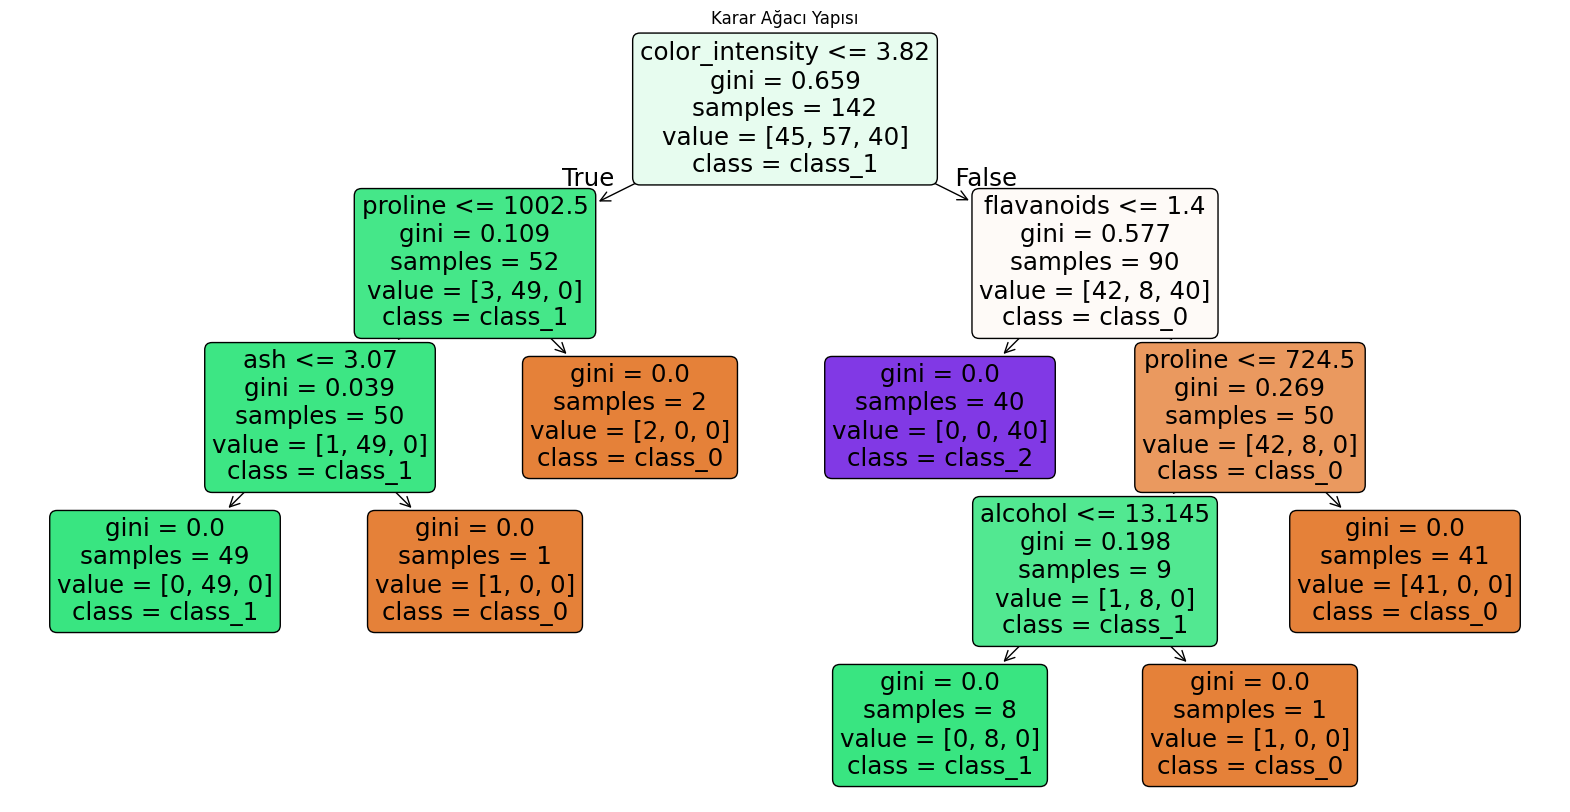

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True)
plt.title("Karar Ağacı Yapısı")
plt.show()

Bir de ROC analizi yapalım


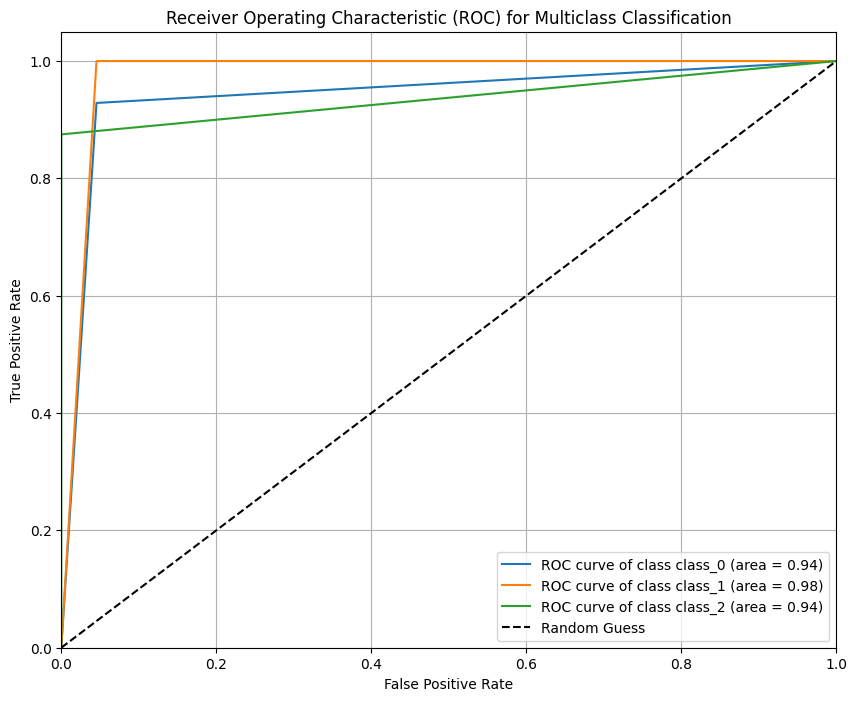

In [11]:
# Binarize the true labels for a one-vs-rest approach
n_classes = len(np.unique(y)) # Get number of unique classes from the full dataset's target
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {wine.target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Sonuç:** Her sınıf için ROC eğrisi rastgele tahmin çizgisinin (kesikli çizgi) oldukça üzerinde seyrediyor. Bu, modelin sınıfları birbirinden ayırmada başarılı olduğunu gösterir.

